In [1]:
# If we're running on Colab, install libraries

# TODO: When Colab can install gala, switch from astro-gala

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astropy astroquery

In [6]:
from math import pi

# fast math operations on arrays
import numpy as np

import astropy.constants as const
import astropy.units as u

import pandas as pd

import matplotlib.pyplot as plt

# give us better plots
plt.matplotlib.rcParams['figure.figsize'] = (6,4) # in "inches ~ sorta"
plt.matplotlib.rcParams['font.size'] = 11

%matplotlib inline

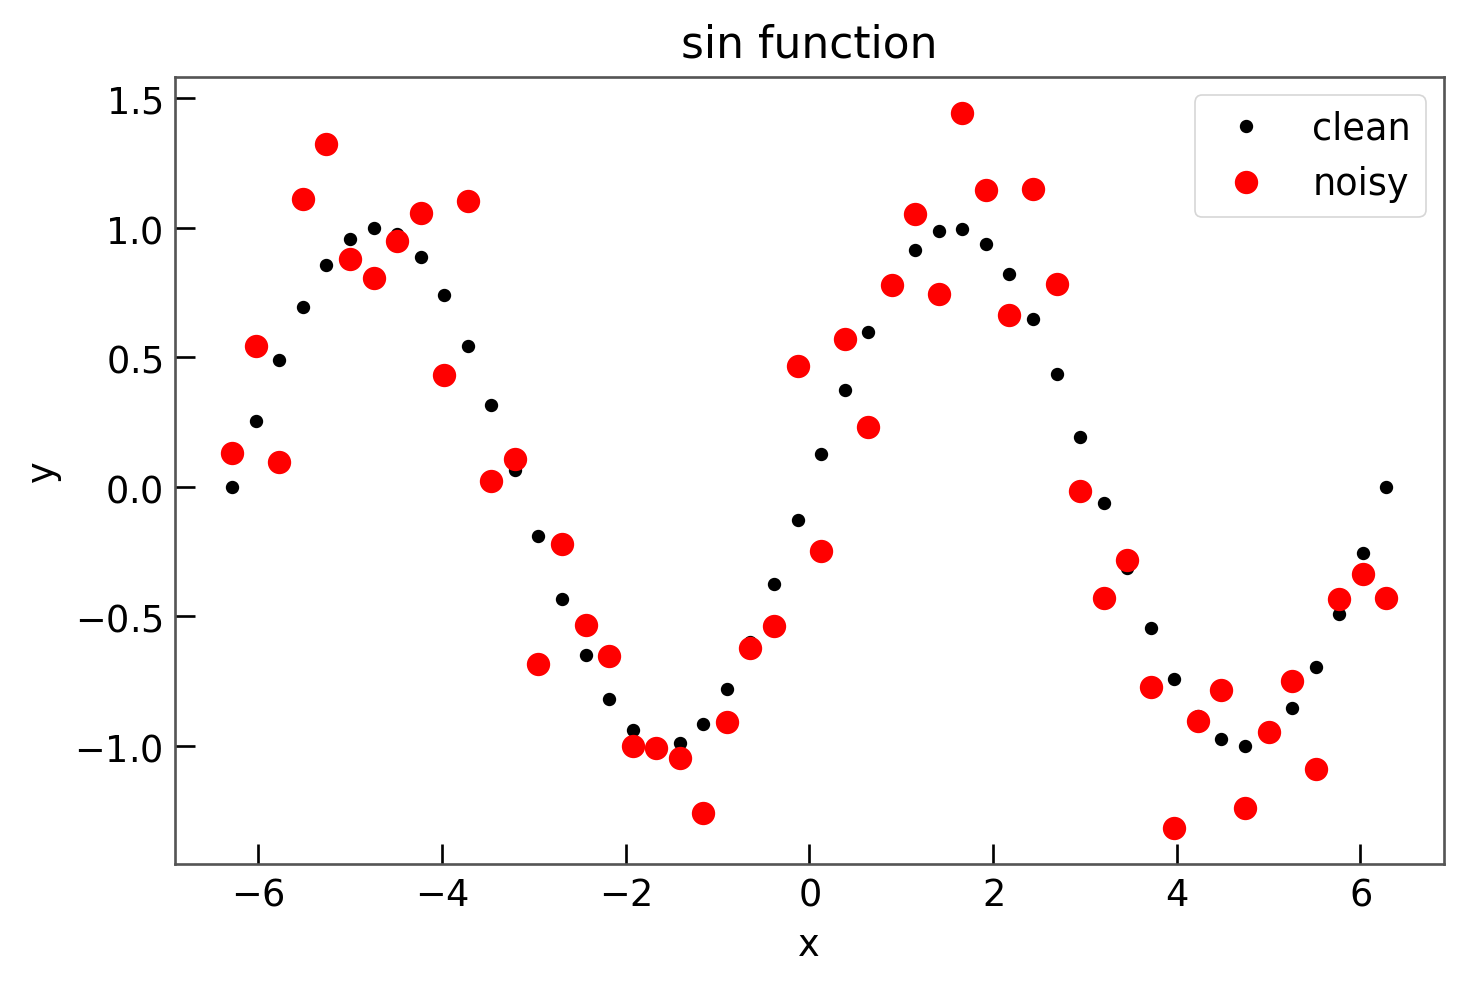

In [93]:

# generate 50 points uniformly distributed between [-2π, 2π]
x = np.linspace(-2 * pi, 2 * pi, 50)

# with numpy we can take the sin of the whole array
y = np.sin(x)

# to make a single plot, we can use plt.plot(x, y)
plt.plot(x, y, 'k.', label = 'clean')


# let's add some noise
# add random noise to y
noise = np.random.normal(loc=0, scale = .3, size = y.size)


# plot noisy data as [r]ed dots[.]
plt.plot(x, y + noise,'ro', label = 'noisy')

# set axes labels
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin function')

# add a legend
plt.legend()

# Do it yourself

In the cell below, copy/paste the above code and then modify it so that
   * The `sin` function has a with period of 3. 
   * Use 200 points for the x values
   * plot the clean data with a line. 
   
   
** Solution for period **

A sin function with period "P" has the form $y = \sin(2 \pi x / P)$

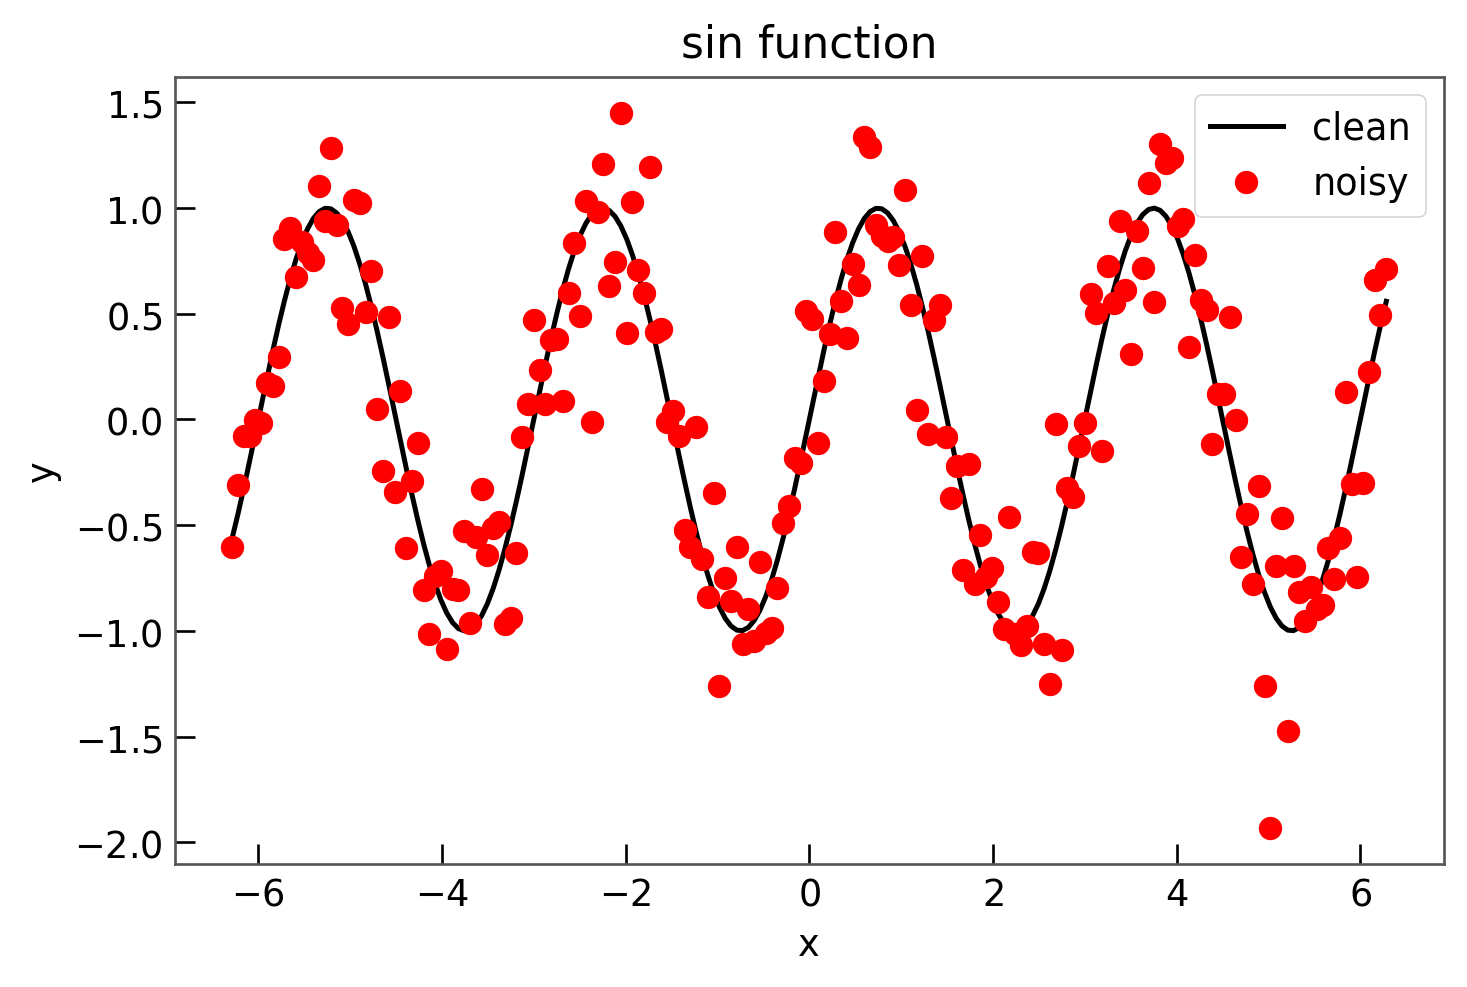

In [94]:

# generate 200 points uniformly distributed between [-2π, 2π]
x = np.linspace(-2 * pi, 2 * pi, 200)

# with numpy we can take the sin of the whole array
y = np.sin(2 * pi * x / 3)

# to make a single plot, we can use plt.plot(x, y)
plt.plot(x, y, 'k-', label = 'clean')


# let's add some noise
# add random noise to y
noise = np.random.normal(loc=0, scale = .3, size = y.size)


# plot noisy data as [r]ed dots[.]
plt.plot(x, y + noise,'ro', label = 'noisy')

# set axes labels
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin function')

# add a legend
plt.legend()

# A more complex function

The following function (or at least it's form) is important later in the class. 

$$ B(x) = \frac{1}{x^5} \frac{1}{e^{(1/x)} - 1} $$


1) Write a function `B` which returns the value of this function

2) Plot the function over a range of **0.02** to **1_000**
    * try using [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [np.logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) and see which gives the best result

## Define the function here

In [77]:
def B(x):
    return x**-5 * (np.exp(1/x) - 1) **-1

## Get the range of x-values

In [78]:
# use np.linspace or np.logspace to get values from 2e-3 to 1_000

# after seeing the plots on linear spacing, i realie log spacing will
# better cover the range of values, since we have tiny and large values
x = np.logspace(np.log10(2e-2), 3, 100)

### Regular unscaled axes

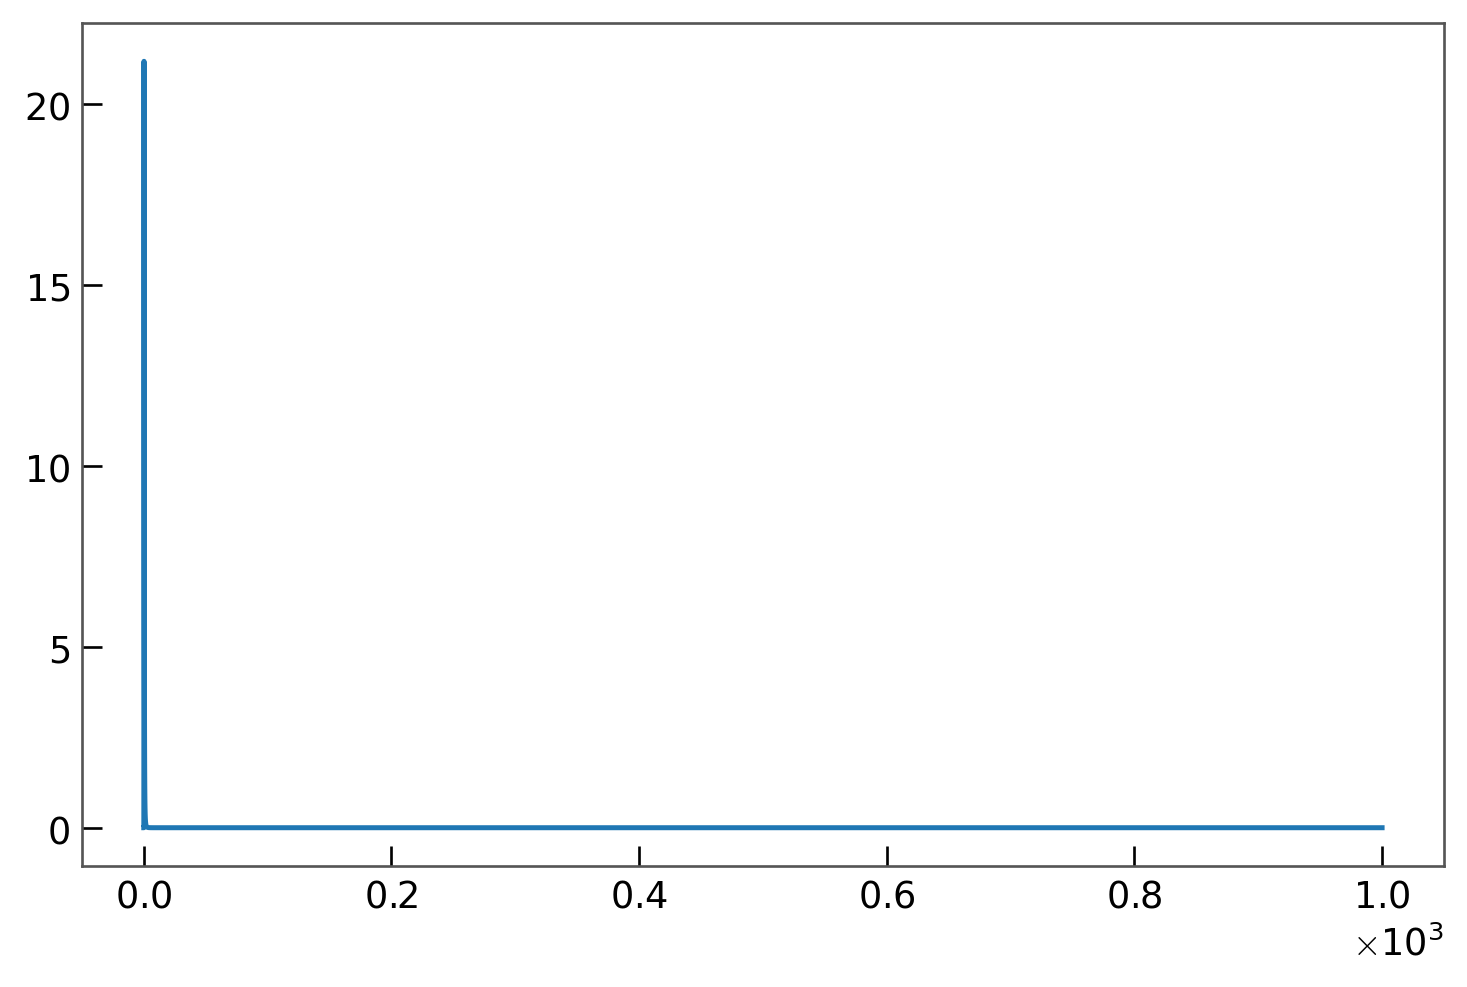

In [79]:
# plot your function

plt.plot(x, B(x))

## Plot with different axes scalings

1) **Plot the same graph but with the (1) x-axis log-scaled, (2) y-axis log-scaled, and (3) both axes log-scaled**
 * The axes should be labeled, and there should be a plot title

We will use [subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html). The *syntax* we use has to change a little (in fact we can use this syntax for single plots too). The whole *canvas* we draw on is called the **figure** (`fig`) and each plot area is a **subplot** with a set of **axes** (`ax`). While when using the `plt` interface, we could just do `plt.xlabel`, when using `ax`/Axes, we need to use `ax.set_xlabel`. 

I have setup the figure and axes for you. And the the x-axis started for you (no scaling is applied yet)

1) Add a meaningful title to each subplot using `ax.set_title('log scaled x')`

Text(0, 0.5, 'B(x)')

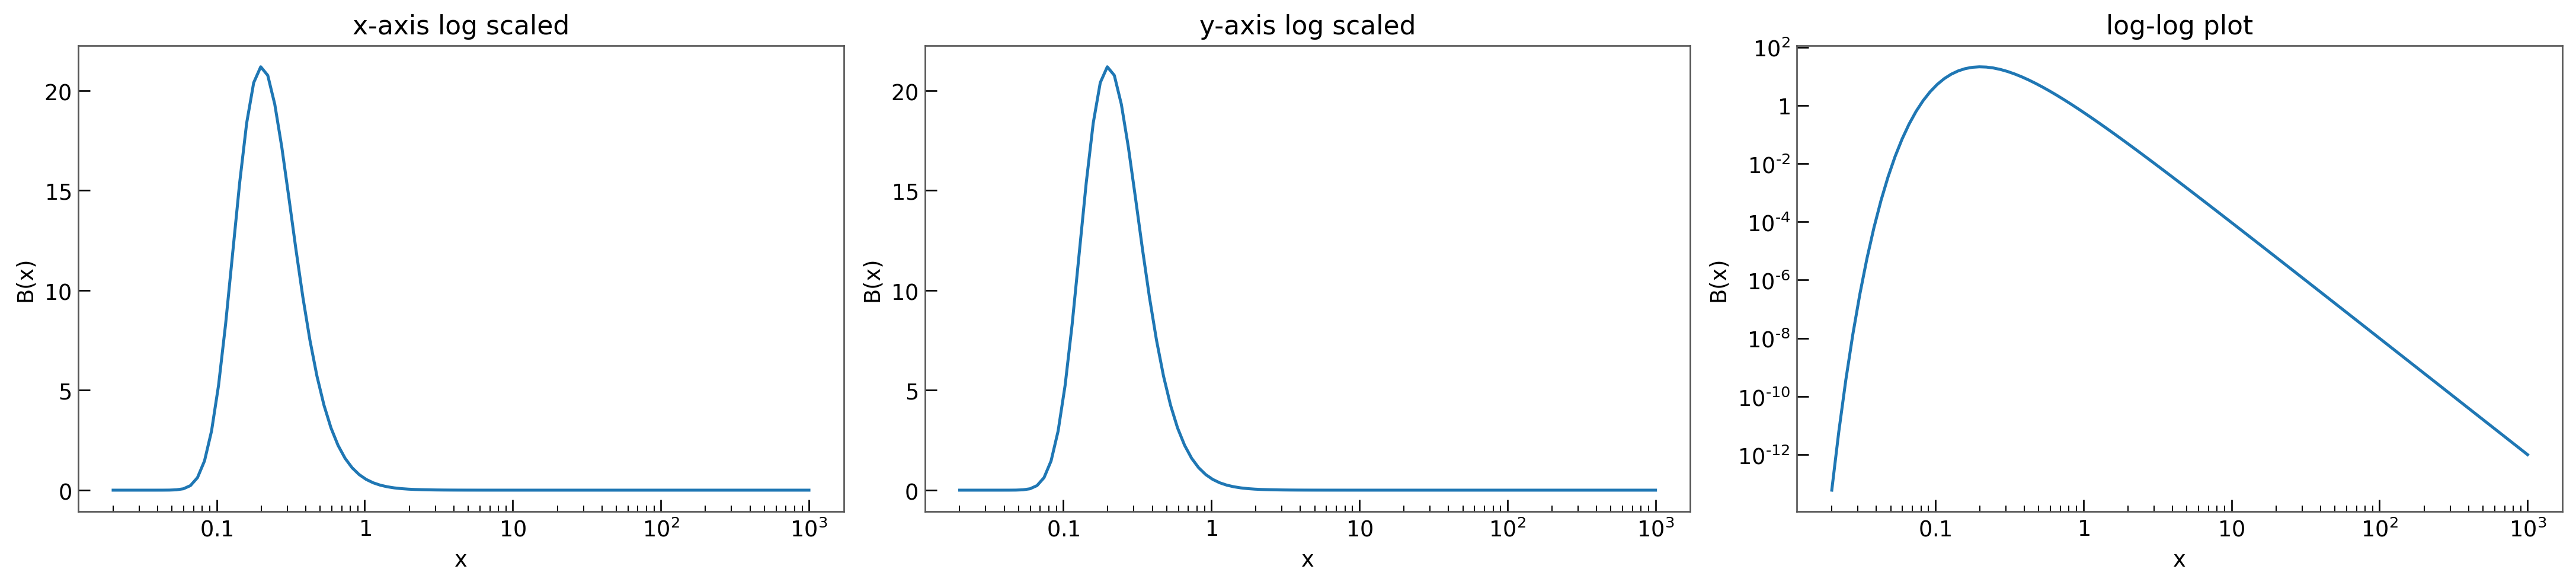

In [80]:
# create a figure with 3 subplots
# we change the figure size to be 3 times as wide as normal
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (6 * 3, 4))

# axs is a list of axes for us to plot on. lists indices start with 0
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

# x-axis lot scaled
ax1.plot(x, B(x))
ax1.set_xscale('log')
# add labels
ax1.set_title('x-axis log scaled')
ax1.set_xlabel('x')
ax1.set_ylabel('B(x)')



# y-axis log scaled
ax2.plot(x, B(x))
ax2.set_xscale('log')
ax2.set_title('y-axis log scaled')
ax2.set_xlabel('x')
ax2.set_ylabel('B(x)')


# both logscaled
ax3.plot(x, B(x))
ax3.loglog()
ax3.set_title('log-log plot')
ax3.set_xlabel('x')
ax3.set_ylabel('B(x)')

# short-hand to do both. It is a log-log plot
#ax3.loglog()

